In [1]:
from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']

In [2]:
url = "https://covid-19.nchc.org.tw/dt_005-covidTable_taiwan.php"

resp = requests.get(url, verify = False)

c:\users\jim87\appdata\local\programs\python\python38\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'covid-19.nchc.org.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
soup = BeautifulSoup(resp.text, 'html.parser')

In [4]:
print(soup.prettify())

﻿
<!DOCTYPE html>
<html lang="Zh-hant" xml:lang="zh-Hant-TW">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta charset="utf-8"/>
  <meta content="http://covid-19.nchc.org.tw" name="url">
   <meta content="最新台灣疫情關鍵報告 | COVID-19 全球即時疫情地圖 | COVID-19 Global Dashboard by Taiwan | COVID-19疫情儀錶板 | 國家高速網路與計算中心" name="site_name">
    <meta content="最新台灣疫情關鍵報告 | COVID-19 新冠肺炎疫情全球大爆發，每天打開新聞各地確診人數不斷向上攀升，各項數字與新聞報導，到底哪個訊息最新聞快? " name="description"/>
    <meta content="最新台灣疫情關鍵報告 | COVID-19 全球即時疫情地圖 | COVID-19 Global Dashboard by Taiwan | COVID-19疫情儀錶板| 國家高速網路與計算中心" property="og:title"/>
    <meta content="website" property="og:type"/>
    <meta content="https://covid-19.nchc.org.tw/" property="og:url">
     <meta content="https://covid-19.nchc.org.tw/imgs/TWCC_poweredBy_S.png" property="og:image"/>
     <meta content="COVID-19 全球疫情地圖" property="og:site_name">
      <meta content=

In [5]:
for button in soup.find_all("button", {"class": "btn-lg"}):
    print(button)

<button class="btn btn-success btn-lg" type="button">新北市 1786<br/><span style="font-size: 0.8em;"> </span></button>
<button class="btn btn-success btn-lg" type="button">台北市 1407<br/><span style="font-size: 0.8em;"> </span></button>
<button class="btn btn-success btn-lg" type="button">桃園市 177<br/><span style="font-size: 0.8em;"> </span></button>
<button class="btn btn-success btn-lg" type="button">彰化縣 96<br/><span style="font-size: 0.8em;"> </span></button>
<button class="btn btn-success btn-lg" type="button">基隆市 53<br/><span style="font-size: 0.8em;"> </span></button>
<button class="btn btn-success btn-lg" type="button">宜蘭縣 41<br/><span style="font-size: 0.8em;"> </span></button>
<button class="btn btn-success btn-lg" type="button">台中市 40<br/><span style="font-size: 0.8em;"> </span></button>
<button class="btn btn-success btn-lg" type="button">高雄市 25<br/><span style="font-size: 0.8em;"> </span></button>
<button class="btn btn-success btn-lg" type="button">屏東縣 17<br/><span style="font-s

In [6]:
button.text.strip()

'澎湖縣 0'

In [7]:
button_list = soup.find_all('button', {"class": "btn-lg"})

In [8]:
count_list = {}

for button in button_list:
    name, count = button.text.strip().split(' ')
    print(f"{name} : {count}")
    count_list[name] = int(count)

新北市 : 1786
台北市 : 1407
桃園市 : 177
彰化縣 : 96
基隆市 : 53
宜蘭縣 : 41
台中市 : 40
高雄市 : 25
屏東縣 : 17
南投縣 : 11
台南市 : 8
新竹市 : 8
新竹縣 : 6
雲林縣 : 6
苗栗縣 : 4
花蓮縣 : 4
嘉義市 : 1
嘉義縣 : 1
連江縣 : 0
金門縣 : 0
台東縣 : 0
澎湖縣 : 0


In [9]:
colors = []
for value in count_list.values():
    r = (125 - value * 125 / 2000) / 360
    print(hsv_to_rgb((r, 0.54, 0.96)))
    colors.append(hsv_to_rgb((r, 0.54, 0.96)))
    
colors

[0.96    0.55716 0.4416 ]
[0.96    0.76182 0.4416 ]
[0.49398 0.96    0.4416 ]
[0.45024 0.96    0.4416 ]
[0.4416  0.96    0.45618]
[0.4416  0.96    0.46266]
[0.4416 0.96   0.4632]
[0.4416 0.96   0.4713]
[0.4416  0.96    0.47562]
[0.4416  0.96    0.47886]
[0.4416  0.96    0.48048]
[0.4416  0.96    0.48048]
[0.4416  0.96    0.48156]
[0.4416  0.96    0.48156]
[0.4416  0.96    0.48264]
[0.4416  0.96    0.48264]
[0.4416  0.96    0.48426]
[0.4416  0.96    0.48426]
[0.4416 0.96   0.4848]
[0.4416 0.96   0.4848]
[0.4416 0.96   0.4848]
[0.4416 0.96   0.4848]


[array([0.96   , 0.55716, 0.4416 ]),
 array([0.96   , 0.76182, 0.4416 ]),
 array([0.49398, 0.96   , 0.4416 ]),
 array([0.45024, 0.96   , 0.4416 ]),
 array([0.4416 , 0.96   , 0.45618]),
 array([0.4416 , 0.96   , 0.46266]),
 array([0.4416, 0.96  , 0.4632]),
 array([0.4416, 0.96  , 0.4713]),
 array([0.4416 , 0.96   , 0.47562]),
 array([0.4416 , 0.96   , 0.47886]),
 array([0.4416 , 0.96   , 0.48048]),
 array([0.4416 , 0.96   , 0.48048]),
 array([0.4416 , 0.96   , 0.48156]),
 array([0.4416 , 0.96   , 0.48156]),
 array([0.4416 , 0.96   , 0.48264]),
 array([0.4416 , 0.96   , 0.48264]),
 array([0.4416 , 0.96   , 0.48426]),
 array([0.4416 , 0.96   , 0.48426]),
 array([0.4416, 0.96  , 0.4848]),
 array([0.4416, 0.96  , 0.4848]),
 array([0.4416, 0.96  , 0.4848]),
 array([0.4416, 0.96  , 0.4848])]

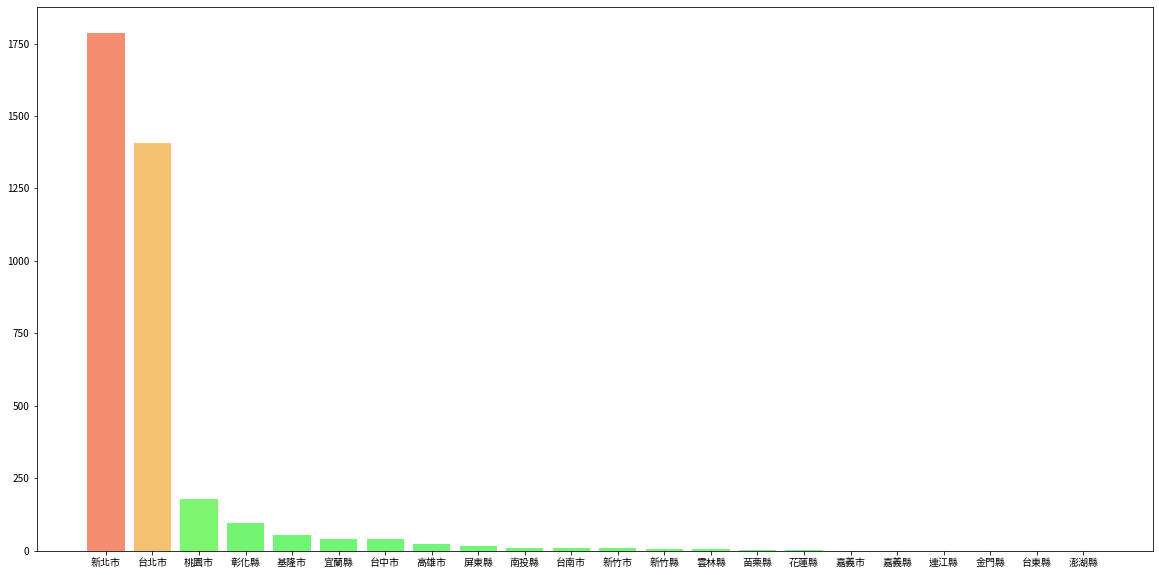

In [10]:
plt.figure(figsize=(20, 10))
plt.bar(count_list.keys(), count_list.values(), bottom = 0, color = colors)
plt.show()